## Final Project Submission

Please fill out:
* Student name: Amanda Gaeta
* Student pace: part time
* Scheduled project review date/time: XXXX
* Instructor name: Lindsey Berlin
* Blog post URL: XXXX


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#import pandas
import pandas as pd
#import imdb files
imdb_tb_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_tc_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
#preview tables
display(imdb_tb_df.head())
display(imdb_tc_df.head())

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [2]:
#make tconst the index across both tables
imdb_tb_df.set_index('tconst', inplace=True)
imdb_tc_df.set_index('tconst', inplace=True)
display(imdb_tb_df.head())
display(imdb_tc_df.head())

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [3]:
#do first join of tconst matches
imdb_title_bc = imdb_tb_df.join(imdb_tc_df, how='inner')
imdb_title_bc.head()

,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [4]:
#import third imdb file with ratings and preview
imdb_tr_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_tr_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [5]:
#set tconst as index to join and preview
imdb_tr_df.set_index('tconst', inplace=True)
imdb_tr_df.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [6]:
#look back at results of first join to the values matching
imdb_title_bc.info()
# less data on wriers and runtime so may not use in this part of analysis

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 7 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
directors          140417 non-null object
writers            110261 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 8.9+ MB


In [7]:
#second join to bring in ratings data, since half as many rows, left join to main df
imdb_title_bcr = imdb_title_bc.join(imdb_tr_df, how='left')
imdb_title_bcr.head()

,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
tconst,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7.0,77.0
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN,7.2,43.0
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648",6.9,4517.0
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899,6.1,13.0
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914",6.5,119.0


In [8]:
#get overview of new df, all available ratings matches to tconst
imdb_title_bcr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 9 columns):
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
directors          140417 non-null object
writers            110261 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.1+ MB


In [9]:
# overview of number of votes for eventual outlier analysis
imdb_title_bcr['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [10]:
# overview of rating distribution
imdb_title_bcr['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [11]:
# find 80th quartile to create subset of top 20% of ratings for analysis
imdb_title_bcr['averagerating'].quantile(.8)

7.6

In [12]:
#create new df of records that have top 20% of ratings for analysis
top_twenty_percent_ratings = imdb_title_bcr.loc[imdb_title_bcr['averagerating'] >= 7.6]

In [13]:
# preview new df
top_twenty_percent_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers,averagerating,numvotes
tconst,,,,,,,,,
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,nm0365480,8.1,263.0
tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,nm0611850,nm0611850,7.6,53.0
tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",nm0417757,"nm0417757,nm1062583",7.8,584.0
tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,nm0011276,"nm0010911,nm0011276,nm1236772",8.8,8.0
tt0262218,Akakis mogzauroba,Akakis mogzauroba,2012,44.0,Documentary,nm0024093,NaN,7.8,22.0


In [14]:
# look at range for numvotes 
top_twenty_percent_ratings['numvotes'].describe()

count    1.512500e+04
mean     4.738591e+03
std      4.936624e+04
min      5.000000e+00
25%      8.000000e+00
50%      1.700000e+01
75%      4.800000e+01
max      1.841066e+06
Name: numvotes, dtype: float64

In [15]:
# import matplotlib to start plotting
import matplotlib.pyplot as plt
%matplotlib inline

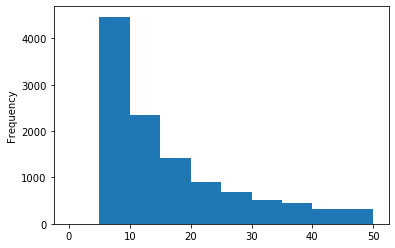

In [16]:
top_twenty_percent_ratings['numvotes'].plot(kind='hist', range=(0,50))

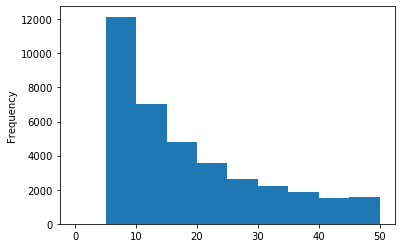

In [17]:
# most of top 20% have less than 10 votes, compare to full population of numvotes
imdb_title_bcr['numvotes'].plot(kind='hist', range=(0,50))
# most titles have <10 votes, so this may not be best dataset to analyze ratings

In [18]:
# import other files that have reviews/ratings
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', 
                            delimiter='\t', encoding='iso-8859-1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [19]:
# rt_reviews only have id, not movie title
# the rt movie info file only has ~1500 records. trying join with reviews as base
# import rt movie info
rt_mi_df = pd.read_csv('rt_movie_info_unpacked.csv')
rt_mi_df.head()

,Unnamed: 0,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
# seeing if can already see matching ids in both files
rt_reviews_df['id'].unique()

array([   3,    5,    6, ..., 1998, 1999, 2000])

In [21]:
# seeing if can already see matching ids in both files
rt_mi_df['id'].unique()

array([   1,    3,    5, ..., 1998, 1999, 2000])

In [22]:
# set index for merge
rt_reviews_df.set_index('id', inplace=True)
rt_mi_df.set_index('id', inplace=True)

In [23]:
#rename same named column
rt_mi_df.rename(columns={'rating': 'movie_rating'}, inplace=True)
rt_mi_df.head()

,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,
1,0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [24]:
#take another look at reviews
rt_reviews_df.head()
#will need many to one join/merge

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [25]:
# how many reviews per id
rt_reviews_df['review'].groupby(['id']).count()

id
3       162
5         6
6        49
8        57
10      107
       ... 
1996    135
1997     19
1998      2
1999     34
2000     34
Name: review, Length: 1135, dtype: int64

In [26]:
#create a variable for easier plotting
n_reviews_by_id = rt_reviews_df['review'].groupby(['id']).count()

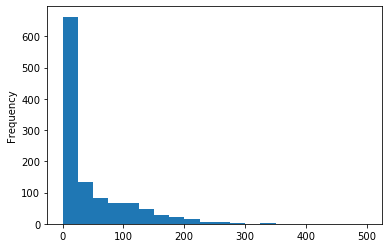

In [27]:
# plot histogram for distribution
n_reviews_by_id.plot(kind='hist', range=(0,500), bins=20)

In [28]:
# get overview of number of reviews per id to see if same low review numbers
n_reviews_by_id.describe()

count    1135.000000
mean       43.056388
std        56.670793
min         0.000000
25%         4.000000
50%        15.000000
75%        67.000000
max       338.000000
Name: review, dtype: float64

In [29]:
import numpy as np

In [30]:
# work on getting % fresh for those with "enough" ratings
rt_reviews_df.groupby(['id', 'fresh']).count()

review  rating  critic  top_critic  publisher  date
id   fresh                                                      
3    fresh      102      70     100         103        103   103
     rotten      60      43      60          60         60    60
5    fresh        6      15      17          18         18    18
     rotten       0       5       4           5          5     5
6    fresh       29      25      28          32         32    32
...             ...     ...     ...         ...        ...   ...
1998 fresh        2       2       2           2          2     2
1999 fresh       22      19      26          27         27    27
     rotten      12      12      18          19         19    19
2000 fresh       17      14      18          18         18    18
     rotten      17      16      18          20         20    20

[2070 rows x 6 columns]

In [31]:
rt_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(1), object(6)
memory usage: 4.6+ MB


In [32]:
# can I get % freshness, map boolean fresh(1)/boolean(0) - map dictionary, sum/total count
# join reviews table rt_reviews_df with movie info rt_mi_df
rt_reviews_df['fresh']

id
3        fresh
3       rotten
3        fresh
3        fresh
3        fresh
         ...  
2000     fresh
2000    rotten
2000    rotten
2000    rotten
2000     fresh
Name: fresh, Length: 54432, dtype: object

In [33]:
map_dict={'fresh':1, 'rotten':0}
rt_reviews_df['fresh'] = rt_reviews_df['fresh'].map(map_dict)

In [34]:
fresh_totals = rt_reviews_df.groupby('id')['fresh'].agg(['count', 'sum'])

In [35]:
fresh_totals['fresh_ratio'] = fresh_totals['sum']/fresh_totals['count']

In [36]:
fresh_totals

,count,sum,fresh_ratio
id,,,
3,163,103,0.631902
5,23,18,0.782609
6,57,32,0.561404
8,75,56,0.746667
10,108,50,0.462963
...,...,...,...
1996,143,96,0.671329
1997,28,10,0.357143
1998,2,2,1.000000


In [37]:
rt_mi_df.head()

,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,
1,0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [38]:
rt_reviews_df

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,1,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,0,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,1,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,1,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,1,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...
2000,The real charm of this trifle is the deadpan c...,NaN,1,Laura Sinagra,1,Village Voice,"September 24, 2002"
2000,NaN,1/5,0,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
2000,NaN,2/5,0,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"


In [39]:
full_rt = rt_mi_df.join(fresh_totals, how='left')

In [40]:
full_rt.head()

,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
id,,,,,,,,,,,,,,,
1,0,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,NaN,NaN,NaN
3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,163.0,103.0,0.631902
5,2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,23.0,18.0,0.782609
6,3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,57.0,32.0,0.561404
7,4,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN,NaN,NaN


In [41]:
full_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 15 columns):
Unnamed: 0      1560 non-null int64
synopsis        1498 non-null object
movie_rating    1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
count           1135 non-null float64
sum             1135 non-null float64
fresh_ratio     1135 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 235.0+ KB


In [42]:
(full_rt['fresh_ratio'] == 0).sum()

78

(array([ 86.,  18.,  44.,  36.,  39.,  38.,  46.,  43.,  49.,  30.,  65.,
         48.,  43.,  77.,  44.,  74.,  74.,  57.,  77., 147.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

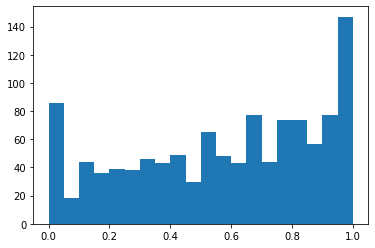

In [43]:
plt.hist(full_rt['fresh_ratio'], bins = 20) 
# want to see how many are sitting at 0 and how many at 1 to see if there is enough data to utilize from this angle

In [44]:
#look at 0s first
fresh_ratio_not_zero = full_rt[(full_rt['fresh_ratio'] != 0)]

In [45]:
#preview, notice no id 2
fresh_ratio_not_zero['fresh_ratio'].head()

id
1         NaN
3    0.631902
5    0.782609
6    0.561404
7         NaN
Name: fresh_ratio, dtype: float64

In [46]:
#how many fresh_ratio values not null
fresh_ratio_not_zero['fresh_ratio'].notna().sum()

1057

In [47]:
fresh_ratio_not_zero_remove = fresh_ratio_not_zero[fresh_ratio_not_zero['fresh_ratio'].isna()]

In [48]:
#look at 1s
fresh_ratio_is_one = full_rt[(full_rt['fresh_ratio'] == 1)]
fresh_ratio_is_one.head()

,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
id,,,,,,,,,,,,,,,
50,37,A New York City police officer (Don Murray) us...,R,Action and Adventure|Drama,Ivan Nagy,Don Petersen|George Wislocki,NaN,NaN,NaN,NaN,99 minutes,NaN,1.0,1.0,1.0
58,45,"A smaller, amusing comedy from writer/director...",PG,Comedy|Romance,Woody Allen,Woody Allen,"Jan 27, 1984","Nov 6, 2001",NaN,NaN,86 minutes,NaN,25.0,25.0,1.0
74,59,"Based on the true story of Cynthia Payne, a fa...",R,Comedy|Drama,Terry Jones,David Leland,NaN,NaN,NaN,NaN,104 minutes,NaN,4.0,4.0,1.0
94,75,"In this gritty drama, a woman discovers that h...",R,Art House and International|Drama|Mystery and ...,Cheryl Dunye,Catherine Crouch|Cheryl Dunye,"Jun 23, 2001","Jul 16, 2002",NaN,NaN,90 minutes,NaN,1.0,1.0,1.0
102,82,"Aging, small town attorney Mac McClain (Matthe...",PG-13,Drama|Mystery and Suspense,Gary Wheeler,Mark Freiburger|Gary Wheeler|Robert Whitlow|Ma...,NaN,NaN,NaN,NaN,101 minutes,Fox,1.0,1.0,1.0


In [49]:
#look at counts for those that have 1s, is there enough input or are these mostly 1 vote
fresh_ratio_is_one['count'].describe()

count    122.000000
mean       7.803279
std       12.377425
min        1.000000
25%        1.000000
50%        2.000000
75%        8.750000
max       72.000000
Name: count, dtype: float64

In [50]:
#grab 1s between Q1 & Q3 to rid of outliers since max is clear outlier at 72
fresh_ratio_one_clean = fresh_ratio_is_one[(fresh_ratio_is_one['count'] >= 1) & (fresh_ratio_is_one['count'] <= 8.75)]

In [51]:
fresh_ratio_one_remove = fresh_ratio_is_one[(fresh_ratio_is_one['count'] < 1) | (fresh_ratio_is_one['count'] > 8.75)]
fresh_ratio_one_remove.count()

Unnamed: 0      31
synopsis        31
movie_rating    31
genre           31
director        30
writer          26
theater_date    30
dvd_date        30
currency         2
box_office       2
runtime         31
studio           4
count           31
sum             31
fresh_ratio     31
dtype: int64

In [52]:
#concat dataframes of nulls and 1 outliers to remove, then remove from full_rrt
to_concat = [fresh_ratio_not_zero_remove, fresh_ratio_one_remove]
fresh_ratio_outliers = pd.concat(to_concat)

In [53]:
# sanity check to make sure I can access the id column/index
full_rt.index

Int64Index([   1,    3,    5,    6,    7,    8,   10,   13,   14,   15,
            ...
            1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999, 2000],
           dtype='int64', name='id', length=1560)

In [54]:
# remove outliers from full_rt
cond = full_rt.index.isin(fresh_ratio_outliers.index)
full_rt_plotting = full_rt.drop(full_rt[cond].index)

In [55]:
#sanity check that removal worked correctly 1560-460 - 1104
print(len(full_rt))
print(len(fresh_ratio_outliers))
print(len(full_rt_plotting))

1560
456
1104


In [56]:
full_rt_plotting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 3 to 2000
Data columns (total 15 columns):
Unnamed: 0      1104 non-null int64
synopsis        1087 non-null object
movie_rating    1103 non-null object
genre           1102 non-null object
director        984 non-null object
writer          865 non-null object
theater_date    966 non-null object
dvd_date        966 non-null object
currency        297 non-null object
box_office      297 non-null object
runtime         1092 non-null object
studio          411 non-null object
count           1104 non-null float64
sum             1104 non-null float64
fresh_ratio     1104 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 138.0+ KB


(array([104.,  80.,  77.,  89.,  79., 113., 120., 118., 131., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

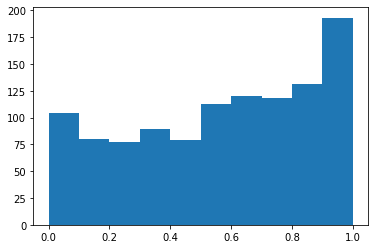

In [57]:
#replotted with cleaned data - no nulls and data checked 1s
plt.hist(full_rt_plotting['fresh_ratio'])

In [58]:
#ids cannot serve as index as some have been dropped, altering how rows can be access, reset index
full_rt_plotting_reindex = full_rt_plotting.reset_index()

In [59]:
#look at new column read out
full_rt_plotting_reindex.columns

Index(['id', 'Unnamed: 0', 'synopsis', 'movie_rating', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio', 'count', 'sum', 'fresh_ratio'],
      dtype='object')

In [60]:
full_rt_plotting_reindex.head()

,id,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
0,3,1,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,163.0,103.0,0.631902
1,5,2,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,23.0,18.0,0.782609
2,6,3,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,57.0,32.0,0.561404
3,8,5,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,75.0,56.0,0.746667
4,10,6,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,108.0,50.0,0.462963


In [61]:
# genre started as string, converted to list with below steps on full_rt
type(full_rt_plotting_reindex['genre'][0])

str

In [62]:
#pulled a single value
full_rt_plotting_reindex['genre'][1]

'Drama|Musical and Performing Arts'

In [63]:
#initially divided by |, replaced with commas
full_rt_plotting_reindex['genre'].replace('|', ',')

0                       Drama|Science Fiction and Fantasy
1                       Drama|Musical and Performing Arts
2                              Drama|Mystery and Suspense
3                                   Drama|Kids and Family
4                                                  Comedy
                              ...                        
1099     Action and Adventure|Horror|Mystery and Suspense
1100                   Comedy|Science Fiction and Fantasy
1101    Classics|Comedy|Drama|Musical and Performing Arts
1102      Comedy|Drama|Kids and Family|Sports and Fitness
1103    Action and Adventure|Art House and Internation...
Name: genre, Length: 1104, dtype: object

In [64]:
#split by commmas
full_rt_plotting_reindex['genre'] = full_rt['genre'].str.split(', ')

In [65]:
# preview values as new list type
full_rt['genre'].head()

id
1    Action and Adventure|Classics|Drama
3      Drama|Science Fiction and Fantasy
5      Drama|Musical and Performing Arts
6             Drama|Mystery and Suspense
7                          Drama|Romance
Name: genre, dtype: object

In [66]:
full_rt_plotting_reindex.head()

,id,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
0,3,1,"New York City, not-too-distant-future: Eric Pa...",R,NaN,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,163.0,103.0,0.631902
1,5,2,Illeana Douglas delivers a superb performance ...,R,[Action and Adventure|Classics|Drama],Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,23.0,18.0,0.782609
2,6,3,Michael Douglas runs afoul of a treacherous su...,R,NaN,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,57.0,32.0,0.561404
3,8,5,The year is 1942. As the Allies unite overseas...,PG,[Drama|Science Fiction and Fantasy],Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,75.0,56.0,0.746667
4,10,6,Some cast and crew from NBC's highly acclaimed...,PG-13,NaN,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,108.0,50.0,0.462963


In [67]:
#do the same with writers, check data type
type(full_rt_plotting_reindex['writer'][0])

str

In [68]:
# take that column, replace pipes with commas, then split
full_rt_plotting_reindex['writer'] = full_rt_plotting_reindex['writer'].str.replace('|',",").str.split(", ")

In [69]:
# check type is list
type(full_rt_plotting_reindex['writer'][0])

list

In [70]:
#preview table
full_rt_plotting_reindex.head()

,id,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
0,3,1,"New York City, not-too-distant-future: Eric Pa...",R,NaN,David Cronenberg,"[David Cronenberg,Don DeLillo]","Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,163.0,103.0,0.631902
1,5,2,Illeana Douglas delivers a superb performance ...,R,[Action and Adventure|Classics|Drama],Allison Anders,[Allison Anders],"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,23.0,18.0,0.782609
2,6,3,Michael Douglas runs afoul of a treacherous su...,R,NaN,Barry Levinson,"[Paul Attanasio,Michael Crichton]","Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,57.0,32.0,0.561404
3,8,5,The year is 1942. As the Allies unite overseas...,PG,[Drama|Science Fiction and Fantasy],Jay Russell,[Gail Gilchriest],"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures,75.0,56.0,0.746667
4,10,6,Some cast and crew from NBC's highly acclaimed...,PG-13,NaN,Jake Kasdan,[Mike White],"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,108.0,50.0,0.462963


(array([104.,  80.,  77.,  89.,  79., 113., 120., 118., 131., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

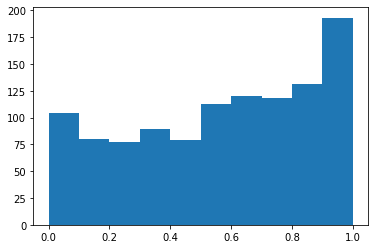

In [71]:
#plot histogram to see new counts, dispersion, still a good portion > 80% fresh rating
plt.hist(full_rt_plotting_reindex['fresh_ratio'])

In [72]:
full_rt_plotting_reindex['fresh_ratio'].describe()

count    1104.000000
mean        0.565198
std         0.309748
min         0.000000
25%         0.325000
50%         0.614710
75%         0.833333
max         1.000000
Name: fresh_ratio, dtype: float64

In [73]:
# what fresh ratio is the threshold for top 20% of movies
full_rt_plotting_reindex['fresh_ratio'].quantile(.8)

0.8731100478468901

In [74]:
# create table of data for top 20% of movies by fresh ratio
top_twentyp_ratio = full_rt_plotting_reindex[(full_rt_plotting_reindex['fresh_ratio'] >= .87)]

In [75]:
#sanity check and view table
top_twentyp_ratio.head()

,id,Unnamed: 0,synopsis,movie_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,count,sum,fresh_ratio
12,23,16,A fictional film set in the alluring world of ...,R,NaN,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures,233.0,213.0,0.914163
22,41,29,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,[Comedy|Drama|Mystery and Suspense],Ken Loach,[Paul Laverty],"May 16, 2003","Oct 7, 2003",$,"201,010",106 minutes,Lions Gate Films,83.0,80.0,0.963855
26,46,34,Six guys with nothing left to lose try losing ...,R,[Art House and International|Comedy|Drama|Musi...,Peter Cattaneo,"[Simon Beaufoy,Simon Beaufor]","Aug 13, 1997","Nov 2, 1999",NaN,NaN,91 minutes,NaN,45.0,43.0,0.955556
28,50,37,A New York City police officer (Don Murray) us...,R,[Classics|Comedy|Musical and Performing Arts|R...,Ivan Nagy,"[Don Petersen,George Wislocki]",NaN,NaN,NaN,NaN,99 minutes,NaN,1.0,1.0,1.000000
29,51,38,"Wait Until Dark is an innovative, highly enter...",NR,[Action and Adventure|Drama|Science Fiction an...,Terence Young,"[Jane-Howard Carrington,Robert Carrington]","Oct 26, 1967","Aug 5, 2003",NaN,NaN,108 minutes,NaN,15.0,14.0,0.933333


In [76]:
# checking the counts of fresh/rotten ratings - it reflects the full population ~15 votes average
top_twentyp_ratio['count'].describe()

count    224.000000
mean      49.062500
std       71.555213
min        1.000000
25%        2.000000
50%       15.000000
75%       59.500000
max      338.000000
Name: count, dtype: float64

In [77]:
#create genre dictionary for analysis on which genres / genre mixes are represented
genre_count_dict = {}

for row in full_rt_plotting_reindex.index:
    if not isinstance(full_rt_plotting_reindex.at[row, 'genre'], list):
        continue
    else:
        for one_genre in full_rt_plotting_reindex.at[row, 'genre']:
            genre_count_dict[one_genre] = genre_count_dict.get(one_genre, 0) + 1

In [78]:
# what key has top value? What genre shows up most in full table
max(genre_count_dict, key=lambda key: genre_count_dict[key])

'Drama'

In [79]:
# sort genre dictionary using w3 schools solution: 
# https://www.w3resource.com/python-exercises/dictionary/python-data-type-dictionary-exercise-1.php
import operator
sorted_genre_count_dict = dict( sorted(genre_count_dict.items(), key=operator.itemgetter(1),reverse=True))

In [80]:
sorted_d 

NameError: name 'sorted_d' is not defined

In [ ]:
#create dictionary for only top 20% movies based on ratings
top_twentyp_genre_count_dict = {}

for row in top_twentyp_ratio.index:
    if not isinstance(top_twentyp_ratio.at[row, 'genre'], list):
        continue
    else:
        for one_genre in top_twentyp_ratio.at[row, 'genre']:
            top_twentyp_genre_count_dict[one_genre] = top_twentyp_genre_count_dict.get(one_genre, 0) + 1

In [ ]:
#sort dictionary in descending order
sorted_twentyp_genre_count_dict = dict( sorted(top_twentyp_genre_count_dict.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
#check length of dictionary for unique values
len(sorted_twentyp_genre_count_dict)

In [ ]:
# view data via histogram plot
%matplotlib inline

D = sorted_twentyp_genre_count_dict
plt.figure(figsize=(10,20))
plt.bar(*zip(*D.items()))
plt.show()

In [ ]:
#many genres with single count, filter those out for more defined view and cleaner plot
filtered_D = {key:value for (key,value) in sorted_twentyp_genre_count_dict.items() if value > 1}

In [ ]:
# create plot of population (Movies with Top 20% Fresh Ratios) and map out distribution of which Genres are represented
plt.figure(figsize=(10,10))
plt.bar(*zip(*filtered_D.items()))
plt.xticks(rotation = 90)
plt.title('Top Movie Genres with High Fresh Ratio')
plt.xlabel('Genre/Genre Mix')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
top_twentyp_ratio.reset_index(inplace = True)

In [ ]:
type(top_twentyp_ratio['genre'][0])

In [ ]:
#how do I pull list of titles that are in top 3-4 genres Drama; Comedy,Drama; Art House and International,Drama
top_twentyp_ratio[top_twentyp_ratio['genre'] == 'Drama']

In [ ]:
# create writer dictionary to see which writer is most represented
writer_count_dict = {}

for row in full_rt_plotting_reindex.index:
    if not isinstance(full_rt_plotting_reindex.at[row, 'writer'], list):
        continue
    else:
        for person in full_rt_plotting_reindex.at[row, 'writer']:
            writer_count_dict[person] = writer_count_dict.get(person, 0) + 1

In [ ]:
max(writer_count_dict, key=lambda key: writer_count_dict[key])

In [ ]:
sorted_writer_count_dict = dict( sorted(writer_count_dict.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
sorted_writer_count_dict 

In [ ]:
# create writer dictionary to see which writer is most represented in top 20%
top_twentyp_writer_count_dict = {}

for row in top_twentyp_ratio.index:
    if not isinstance(top_twentyp_ratio.at[row, 'writer'], list):
        continue
    else:
        for person in top_twentyp_ratio.at[row, 'writer']:
            top_twentyp_writer_count_dict[person] = top_twentyp_writer_count_dict.get(person, 0) + 1

In [ ]:
max(top_twentyp_writer_count_dict, key=lambda key: top_twentyp_writer_count_dict[key])

In [ ]:
#view Woody Allen count and dictionary values
sorted_toptwenty_writer_count_dict = dict( sorted(top_twentyp_writer_count_dict.items(), key=operator.itemgetter(1),reverse=True))
sorted_toptwenty_writer_count_dict
# can't get much out of thise as all but Woody Allen has a single movie represented